In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

from os import listdir, path, makedirs
from os.path import isfile, join
import shutil

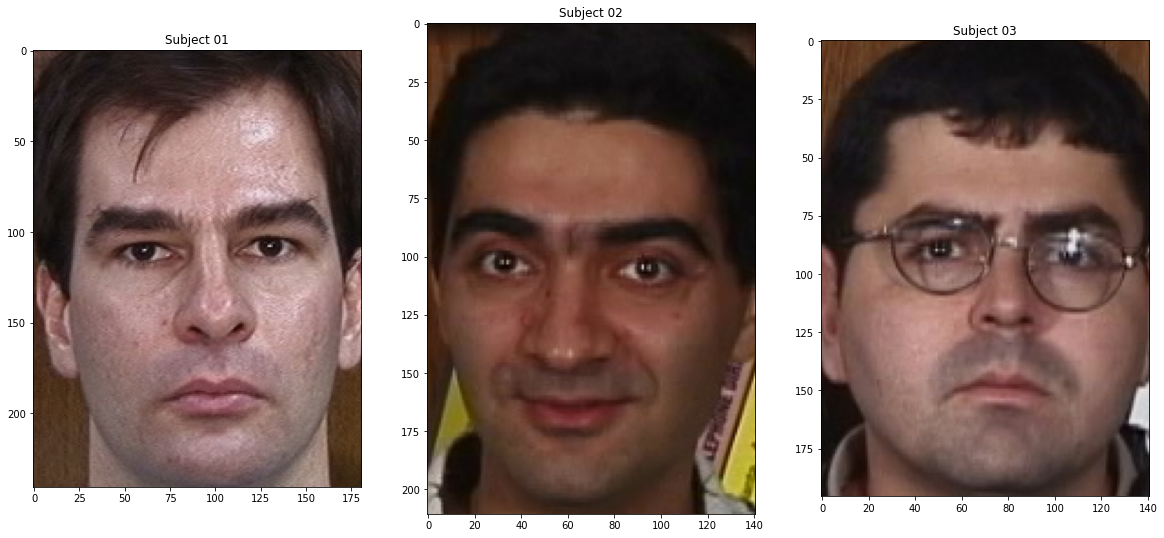

In [3]:
image_face_1 = cv.imread("cropped_faces/s01_01.jpg");
image_face_1 = cv.cvtColor(image_face_1, cv.COLOR_BGR2RGB)

image_face_2 = cv.imread("cropped_faces/s02_01.jpg");
image_face_2 = cv.cvtColor(image_face_2, cv.COLOR_BGR2RGB)

image_face_3 = cv.imread("cropped_faces/s03_01.jpg");
image_face_3 = cv.cvtColor(image_face_3, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Subject 01")
plt.imshow(image_face_1)
plt.subplot(132)
plt.title("Subject 02")
plt.imshow(image_face_2)
plt.subplot(133)
plt.title("Subject 03")
plt.imshow(image_face_3)
plt.show()

In [4]:
image_face_1.shape

(241, 181, 3)

In [5]:
image_face_2.shape

(211, 141, 3)

In [6]:
image_face_3.shape

(196, 141, 3)

In [7]:
faces_path = "cropped_faces/"
file_faces_list = [f for f in listdir(faces_path) if isfile(join(faces_path, f))]

In [8]:
file_faces_list[0]

's17_04.jpg'

In [9]:
len(file_faces_list)

750

In [10]:
faces_path_train = "train/"
faces_path_test = "test/"

if not path.exists(faces_path_train):
    makedirs(faces_path_train)
    
if not path.exists(faces_path_test):
    makedirs(faces_path_test)

for file_face in file_faces_list:
    subject_face = file_face[1:3]
    number_face = file_face[4:6]
    
    if int(number_face) <= 10:
        shutil.copyfile(faces_path + file_face, faces_path_train + file_face)
    else:
        shutil.copyfile(faces_path + file_face, faces_path_test + file_face)

In [20]:
def prepare_images(image_path):
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (200, 200), interpolation=cv.INTER_LANCZOS4)
    return image

In [21]:
list_faces_train = [f for f in listdir(faces_path_train) if isfile(join(faces_path_train, f))]
list_faces_test = [f for f in listdir(faces_path_test) if isfile(join(faces_path_test, f))]

In [22]:
list_faces_test[0]

's01_15.jpg'

In [23]:
list_faces_train[0]

's17_04.jpg'

In [24]:
train_data, labels = [],[]

In [25]:
for i, file in enumerate(list_faces_train):
    image_path = faces_path_train + file
    image = prepare_images(image_path)
    train_data.append(image)
    labels.append(int(file[1:3]))

In [26]:
labels[0]

17

In [27]:
len(train_data)

500

In [28]:
len(labels)

500

In [29]:
test_data, test_labels = [],[]

In [30]:
for i, file in enumerate(list_faces_test):
    image_path = faces_path_test + file
    image = prepare_images(image_path)
    test_data.append(image)
    test_labels.append(int(file[1:3]))

In [31]:
len(test_data)

250

In [32]:
len(test_labels)

250